In [3]:
import pandas as pd 
import numpy as np
import scipy.stats as stats

In [15]:
!pwd

/Users/emiliekibsgaard/Desktop/MetaprivBIDS-Assessment/AOMIC-ID1000-ds003097


In [17]:
import sys
sys.path.append("/Users/emiliekibsgaard/Desktop/MetaprivBIDS-Assessment")  
import metapriv_stat as ST
from metapriv_stat import plot_calc
from metapriv_stat import rst_outlier_case2

In [5]:
AOMIC = 'https://s3.amazonaws.com/openneuro.org/ds003097/participants.tsv?versionId=9gylMj_lF7dOQFiiUSuQ4OeHtgxzGUtv'

AOMIC = pd.read_csv(AOMIC, sep='\t')
#AOMIC.replace(np.nan, -999, inplace=True)
AOMIC.to_csv('data_ds003097/AOMIC_dataset_ds003097.csv', sep=',', index=False)

In [182]:
na_percentage = AOMIC.isna().mean() * 100
na_percentage = na_percentage[na_percentage >= 10].sort_values(ascending=False)
na_percentage

religious_importance    78.771552
sexual_attraction_M     40.301724
sexual_attraction_F     40.301724
gender_identity_M       40.301724
gender_identity_F       40.301724
dtype: float64

In [9]:
suda = pd.read_csv('data_ds003097/SUDA_ds003097.csv', sep=',')
pif = pd.read_csv('data_ds003097/PIF_ds003097.csv', sep=',',index_col='Unnamed: 0').sort_index()
suda_field_score =  pd.read_csv('data_ds003097/att_suda.csv', sep=',').drop(columns=['Unnamed: 0'], errors='ignore')
k_combined_field =  pd.read_csv('data_ds003097/normalized_difference_results.csv', sep=',').drop(columns=['Difference in Unique Rows','Unique Rows After Removal']).rename(columns={'Column': 'variable'})
k_combined_all = pd.read_csv('data_ds003097/k-combined-all-2-11.csv', sep=',')
k_combined_field_non_risk = pd.read_csv('data_ds003097/normalized_difference_results_non.csv', sep=',').drop(columns=['Difference in Unique Rows','Unique Rows After Removal']).rename(columns={'Column': 'variable'})

In [10]:
AOMIC

,participant_id,age,sex,handedness,BMI,education_level,background_SES,IST_fluid,IST_memory,IST_crystallised,...,sexual_attraction_M,sexual_attraction_F,gender_identity_M,gender_identity_F,religious_upbringing,religious_now,religious_importance,DWI_TR_run1,DWI_TR_run2,DWI_TR_run3
0,sub-0001,22.00,female,right,23,medium,2.0,77.0,49.0,33.0,...,7.0,1.0,1.0,7.0,no,yes,2.0,6.312,6.312,6.312
1,sub-0002,21.75,female,right,20,medium,5.5,97.0,63.0,39.0,...,7.0,1.0,2.0,7.0,no,no,NaN,NaN,6.311,6.311
2,sub-0003,25.25,female,right,31,high,3.0,122.0,67.0,38.0,...,6.0,3.0,1.0,6.0,no,no,NaN,6.312,6.312,6.312
3,sub-0004,22.50,female,right,20,high,5.0,149.0,69.0,52.0,...,6.0,2.0,1.0,7.0,yes,no,NaN,6.311,6.311,6.311
4,sub-0005,22.25,male,right,23,high,4.5,112.0,57.0,43.0,...,1.0,7.0,6.0,1.0,no,no,NaN,6.311,6.311,6.311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923,sub-0924,22.25,male,right,21,medium,3.0,136.0,56.0,54.0,...,2.0,6.0,4.0,4.0,no,no,NaN,6.374,6.374,6.374
924,sub-0925,25.25,male,right,30,medium,4.0,64.0,37.0,49.0,...,1.0,7.0,7.0,1.0,no,no,NaN,6.311,6.311,6.311
925,sub-0926,20.75,male,right,22,high,2.0,84.0,44.0,33.0,...,NaN,NaN,NaN,NaN,yes,yes,5.0,6.312,6.312,6.312
926,sub-0927,24.25,female,right,35,medium,2.5,98.0,57.0,35.0,...,7.0,2.0,1.0,7.0,no,no,NaN,6.311,6.311,6.311



        ROW LEVEL CORRELATION      

Spearman Rank Correlation between suda & pif: 0.76
Kendall's Tau between suda & pif: 0.61, p-value: 0.0000


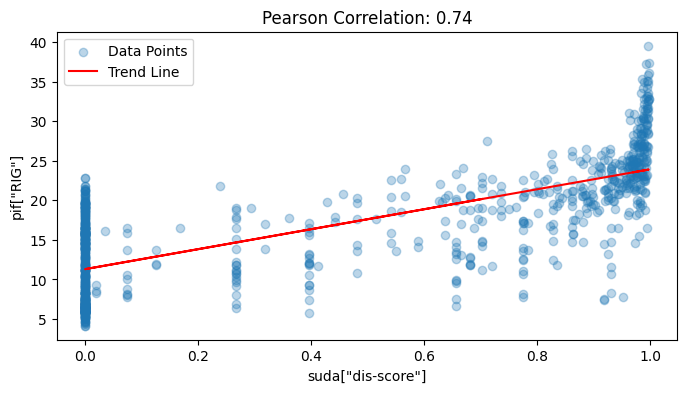

____________________________________________________________________________________

      FIELD LEVEL CORRELATIONS     

Pearson Correlation between SUDA & PIF field level: 0.72
Pearson Correlation between K-combined & PIF field level: 0.43
Pearson Correlation between SUDA & K-combined field level: -0.02


Spearman Rank Correlation between PIF & SUDA: 0.72
Spearman Rank Correlation between PIF & K: 0.27
Spearman Rank Correlation between SUDA & K: 0.01


In [73]:
ST.stats(suda, pif, suda_field_score, k_combined_field)

# WHOLE DATASET RISK VALUE SUM

In [ ]:
sum_score_df  = ST.calculate_summed_dis_scores(k_combined_all, AOMIC, sample_fraction=0.3, missing_value= np.nan)

In [ ]:
plot_calc(sum_score_df)

## T-test between risky and non-risky k-global values for variables. 

### Non risky variables

In [75]:
k_combined_field_non_risk

,variable,Normalized Difference
0,BAS_reward,0.0
1,BAS_drive,0.0
2,BAS_fun,0.0
3,BIS,0.0
4,BMI,0.0
5,IST_fluid,0.0
6,IST_crystallised,0.0
7,STAI_T,0.0
8,IST_memory,0.0
9,NEO_O,0.0


### Risk variables 

In [333]:
k_combined_field

,variable,Normalized Difference
0,education_level,42.7
1,background_SES,41.8
2,sex,34.0
3,handedness,18.5
4,age,18.3
5,gender_identity_M,2.4
6,gender_identity_F,1.0
7,sexual_attraction_M,0.3
8,sexual_attraction_F,0.3


## Test

In [329]:
mean_risk_values = (k_combined_field['Normalized Difference']).mean()
mean_risk_values

17.700000000000003

In [330]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [331]:
mean_non_risky_values = mean_confidence_interval(k_combined_field_non_risk['Normalized Difference'], confidence=0.95)
mean_non_risky_values

(0.0, 0.0, 0.0)

In [332]:
def two_sample_t_test_summary(data1, data2, equal_var=False):

    t_stat, p_value = stats.ttest_ind(data1, data2, equal_var=equal_var)

    mean1 = np.mean(data1)
    mean2 = np.mean(data2)
    
    df = (len(data1) - 1) + (len(data2) - 1) if equal_var else None
    df_text = f"({df})" if df else "(Welch's adjustment)"
    print(f"t{df_text} = {t_stat:.2f}, p = {p_value:.3f}, mean1 = {mean1:.2f}, mean2 = {mean2:.2f}")
    
    return t_stat, p_value, mean1, mean2

t_stat, p_value, mean1, mean2 = two_sample_t_test_summary(k_combined_field['Normalized Difference'], k_combined_field_non_risk['Normalized Difference'], equal_var=False)

if p_value < 0.05:
    print("There is a significant difference between the two groups.")
else:
    print("There is no significant difference between the two groups.")


t(Welch's adjustment) = 2.95, p = 0.018, mean1 = 17.70, mean2 = 0.00
There is a significant difference between the two groups.


In [84]:
t, p = stats.ttest_ind(k_combined_field['Normalized Difference'], k_combined_field_non_risk['Normalized Difference'])

In [85]:
t, p

(3.5330157580608517, 0.0016250577714283616)

### PIF & SUDA Outliers 

In [18]:
#SUDA
class_outliers, madn, mad, outlier_indices, above_outlier_indices = ST.rst_outlier_case2(suda, 'dis-score')

In [20]:
print(len(above_outlier_indices))

434


In [21]:
#PIF
class_outliers, madn, mad, outlier_indices, above_outlier_indices = rst_outlier_case2(pif, 'RIG')
print(len(above_outlier_indices))

6


In [362]:
AOMIC.loc[338]

participant_id            sub-0339
age                          22.75
sex                         female
handedness                   right
BMI                             27
education_level               high
background_SES                 6.0
IST_fluid                    138.0
IST_memory                    61.0
IST_crystallised              46.0
IST_intelligence_total       245.0
BAS_drive                       15
BAS_fun                         14
BAS_reward                      19
BIS                             17
NEO_N                           32
NEO_E                           45
NEO_O                           40
NEO_A                           40
NEO_C                         32.0
STAI_T                        31.0
sexual_attraction_M            3.0
sexual_attraction_F            6.0
gender_identity_M              3.0
gender_identity_F              4.0
religious_upbringing            no
religious_now                   no
religious_importance           NaN
DWI_TR_run1         

## Improving Risk

In [22]:
suda_improved = pd.read_csv('data_ds003097/improved_suda.csv', sep=',')
pif_improved = pd.read_csv('data_ds003097/improved_PIF.csv', sep=',',index_col='Unnamed: 0').sort_index()

In [23]:
class_outliers, madn, mad, outlier_indices, above_outlier_indices = ST.rst_outlier_case2(suda_improved, 'dis-score')
print(len(above_outlier_indices))

84


../metapriv_stat.py:248: RuntimeWarning: divide by zero encountered in true_divide
  z_scores = (column_data_array - median) / madn
../metapriv_stat.py:248: RuntimeWarning: invalid value encountered in true_divide
  z_scores = (column_data_array - median) / madn


In [25]:
class_outliers, madn, mad, outlier_indices, above_outlier_indices = rst_outlier_case2(pif_improved, 'RIG')
print(len(above_outlier_indices))

18
